###  Data Cleaning / Очистка данных
На этом этапе:
1. Удаление дубликатов


Drop unwanted observations
Fix structural errors
Remove unwanted outliers
Label missing categorical data
Flag and fill missing numerical data

In [2]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline
import seaborn as sns

In [3]:
conn = sqlite3.connect('db\cian_fake_2.db') 
          
df = pd.read_sql_query ('''
                               SELECT
                               flat_type, rooms, price, price_per_meter, sale_type, mortgage, area,
                       living_area, kitchen_area, floor, floors, built_year, address, district, metro_station, seller,
                       housing_type, planning, ceiling_height, bathroom, balcony_loggia, repair, view,
                       finished_shell_condition, house_type, house_class, building_number, parking, elevators,
                       housing_line, floor_type, entrance_number, heating, unsafe_house, garbage_disposal, gas_supply,
                       description_text
                               FROM ad_data
                               ''', conn)

1. Удаление дубликатов

In [4]:
# удаление обычных дубликатов
df = df.drop_duplicates()
print(df.shape)

(10000, 37)


In [6]:
# помимо обычных дубликатов также больше одного объявления могут относится к одной квартире
# у такаих дубликатов адрес, этаж, тип, количество комнат, площадь кухни должны совпадать
print(df[df.duplicated(subset = ['address', 'flat_type', 'floor', 'floors', 'kitchen_area'])])
df = df.drop_duplicates(subset = ['address', 'flat_type', 'floor', 'floors', 'kitchen_area'])
print(df.shape)

Empty DataFrame
Columns: [flat_type, rooms, price, price_per_meter, sale_type, mortgage, area, living_area, kitchen_area, floor, floors, built_year, address, district, metro_station, seller, housing_type, planning, ceiling_height, bathroom, balcony_loggia, repair, view, finished_shell_condition, house_type, house_class, building_number, parking, elevators, housing_line, floor_type, entrance_number, heating, unsafe_house, garbage_disposal, gas_supply, description_text]
Index: []

[0 rows x 37 columns]
(10000, 37)


In [7]:
# TODO сейчас среди всех дубликатов остается первый. Но изначально цена и другая информация разные. Цену можно усреднить, а что делать с категориальными данными?

2 Fix structural errors

In [11]:
# отбражение уникальных значений столбца "отделка"
df['finished_shell_condition'].unique()

array(['нет', 'предчистовая', None, 'чистовая', 'черновая'], dtype=object)

In [12]:
# замена None-значений на 0
df['finished_shell_condition'] = df['finished_shell_condition'].fillna(0)

In [14]:
# проверка замены
df['finished_shell_condition'].unique()

array(['нет', 'предчистовая', 0, 'чистовая', 'черновая'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='finished_shell_condition'>

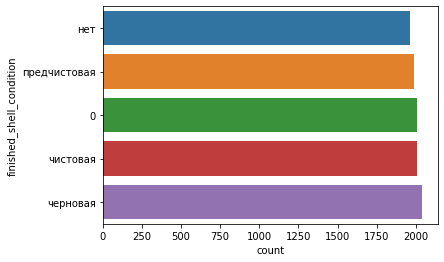

In [18]:
# построение гистограммы для вывления опечаток и неодинаковых регистров
sns.countplot(y='finished_shell_condition', data=df)

In [ ]:
# TODO если есть опечатки, исправить по типу df.roof.replace('composition', 'Composition', inplace=True)

3 Обработка выбросов